# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

img_path = '../data/lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

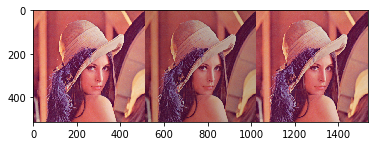

In [2]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float')
img_hsv_down[...,-1] = np.clip(img_hsv_down[...,-1]*(1-change_percentage), 0, 255)
img_hsv_down = img_hsv_down.astype('uint8')

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float')
img_hsv_up[...,-1] = np.clip(img_hsv_down[...,-1]*(1+change_percentage), 0, 255)
img_hsv_up = img_hsv_up.astype('uint8')

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
plt.imshow(cv2.cvtColor(img_hsv_change, cv2.COLOR_BGR2RGB))
# while True:
#     cv2.imshow('change saturation', img_hsv_change)
    
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

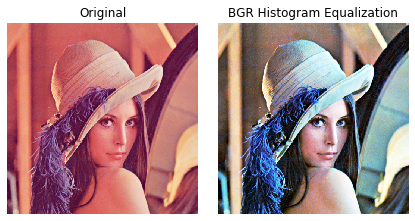

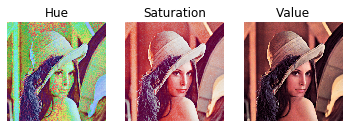

In [3]:
# case 1
# 每個 channel 個別做直方圖均衡
# 組合經過直方圖均衡的每個 channel
img_bgr_equal = np.array(img)
     
for i in range(3):
    img_bgr_equal[:,:,i] = cv2.equalizeHist(img[:,:,i])


# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
# Create hsv_equal with another dimension (3, 512, 512, 3)
# Sperately do Histogram Equalization on H, S, V channels
img_hsv_equal = np.array(img)
img_hsv_equal = np.stack((img_hsv_equal, img_hsv_equal, img_hsv_equal))

for i in range(3):
    img_hsv_equal[i] = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img_hsv_equal[i,:,:,i] = cv2.equalizeHist(img_hsv_equal[i,:,:,i])
    img_hsv_equal[i] = cv2.cvtColor(img_hsv_equal[i], cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal[0], img_hsv_equal[1], img_hsv_equal[2]))

plt.subplot(1,2,1)
plt.axis('off')
plt.title('Original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.axis('off')
plt.title('BGR Histogram Equalization')
plt.imshow(cv2.cvtColor(img_bgr_equal, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.figure()

plt.tight_layout()
plt.subplot(1,3,1)
plt.axis('off')
plt.title('Hue')
plt.imshow(cv2.cvtColor(img_hsv_equal[0], cv2.COLOR_BGR2RGB))

plt.subplot(1,3,2)
plt.axis('off')
plt.title('Saturation')
plt.imshow(cv2.cvtColor(img_hsv_equal[1], cv2.COLOR_BGR2RGB))

plt.subplot(1,3,3)
plt.axis('off')
plt.title('Value')
plt.imshow(cv2.cvtColor(img_hsv_equal[2], cv2.COLOR_BGR2RGB))

# while True:
#     # 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
#     cv2.imshow('bgr equal histogram', img_bgr_equalHist)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

## 調整對比 / 明亮

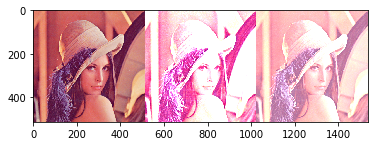

In [4]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=2.5, beta=0) 
add_lighness = cv2.convertScaleAbs(img, alpha=1, beta=100)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
plt.imshow(cv2.cvtColor(img_contrast_light, cv2.COLOR_BGR2RGB))
# while True:
#     # 比較不同程度的對比 / 明亮
#     cv2.imshow('adjust contrast and brighness', img_contrast_light)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break